#Data Science and Business Analytics Intern @ The Sparks Foundation
##S Arut Prakash : Task 3 Retail: Exploratory Data Analysis

#Perform 'Exploratory Data Analysis' on the provided dataset "SampleSuperStore"

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import requests
import warnings
import io
warnings.filterwarnings('ignore')

##Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Science and Business Analytics - Spark Internship/Task 3 - Explore Buisness Analytics

/content/drive/MyDrive/Colab Notebooks/Data Science and Business Analytics - Spark Internship/Task 3 - Explore Buisness Analytics


In [ ]:
sample=pd.read_csv(r'SampleSuperstore.csv')

##Basic Exploration of Data

In [ ]:
sample.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


Checking for Missing Values

In [ ]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Columns

In [ ]:
sample.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Number of Uniques

In [ ]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Concise Summary** 

The index dtype and columns, non-null values and memory usage.

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Descriptive statistics**

summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Corelation between variables

In [ ]:
sample.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Dropping Postal Code (Since its not a quantitative variable)

In [ ]:
col=['Postal Code']
sample1=sample.drop(columns=col,axis=1)

#Data Visualisation 

Plotting Sales and Profits

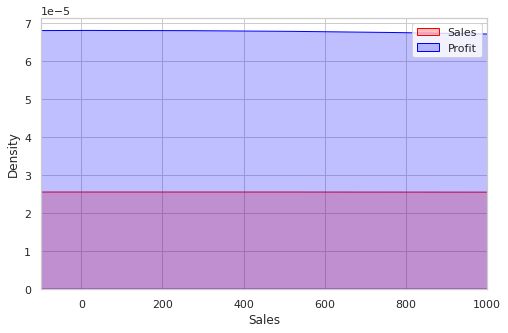

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(sample1['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(sample1['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

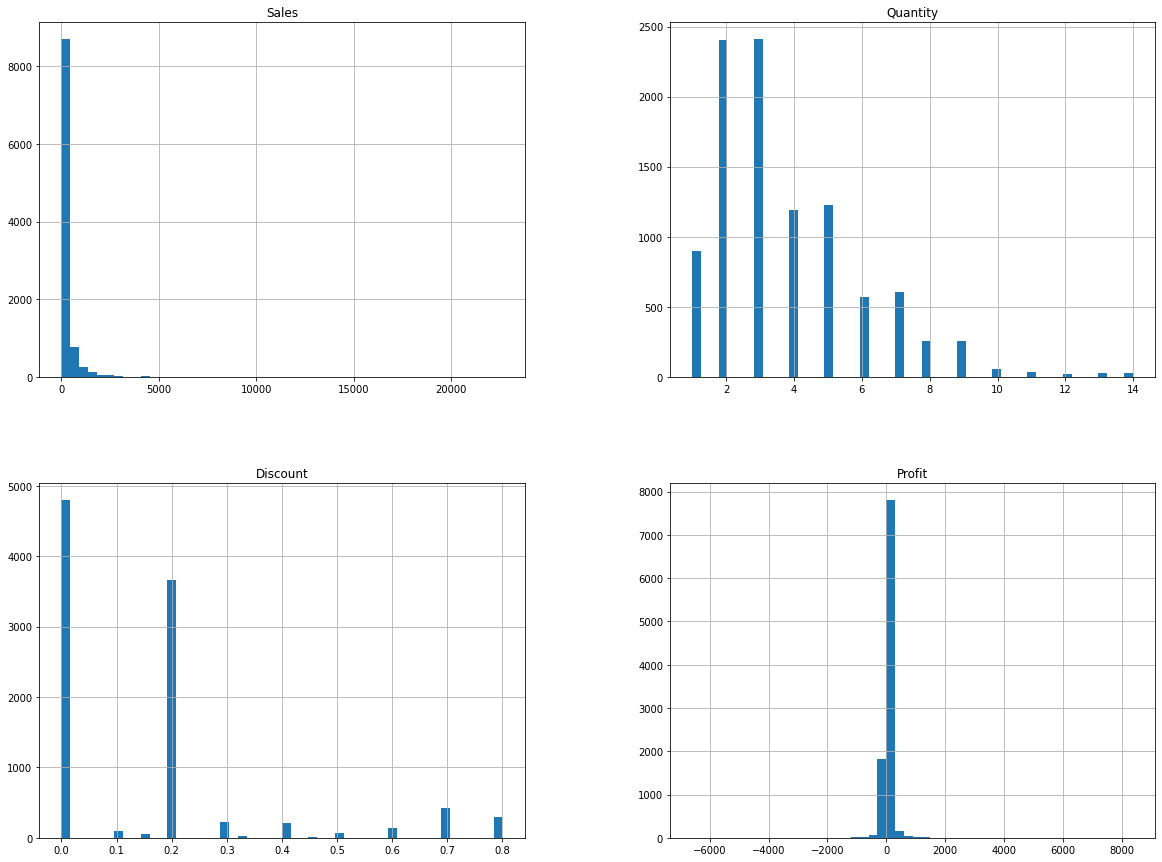

In [ ]:
sample1.hist(bins=50 ,figsize=(20,15))
plt.show();

Sales and Profits have a huge spike in close to zero.

Most common discount across categories is 20%

Over 2000 entites have quantities 2 and 3 and there are only one quantity available for about 800 entities which is interesting for a retail which can indicate the demand and supply

We see a disproportionate data in the histograms. This may be due to including of all the categories.

Hence there is a need to explore sub categories.

## Sub Categories by Profit

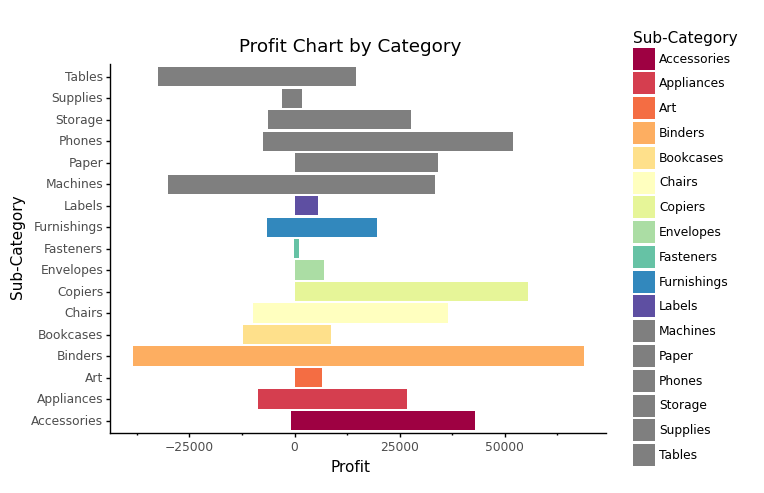

<ggplot: (8778406806949)>

In [ ]:
Profit_plot = (ggplot(sample, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit Chart by Category'))

display(Profit_plot)

We can see profits from Binder and Machines are highly volatile. 

solid and high Profitability in : Paper, Copier, Accessories 

##Categor based Consumption Patterns in the United States

Text(0.5, 0.98, 'Consumption Patterns in the United States')

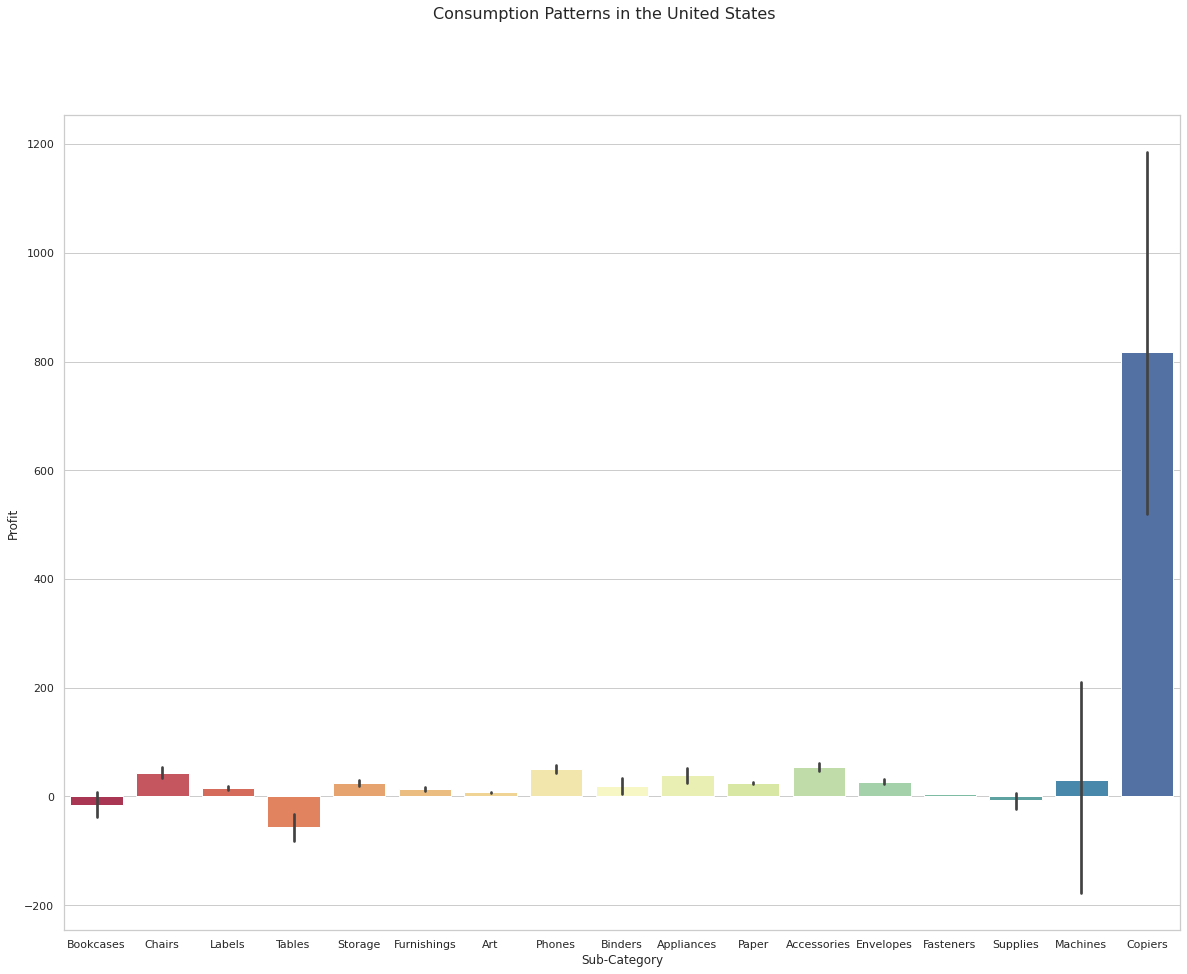

In [ ]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))

sns.barplot(x='Sub-Category',y='Profit', data=sample, palette='Spectral')

plt.suptitle('Consumption Patterns in the United States', fontsize=16)

Category Based on Shipping Modes

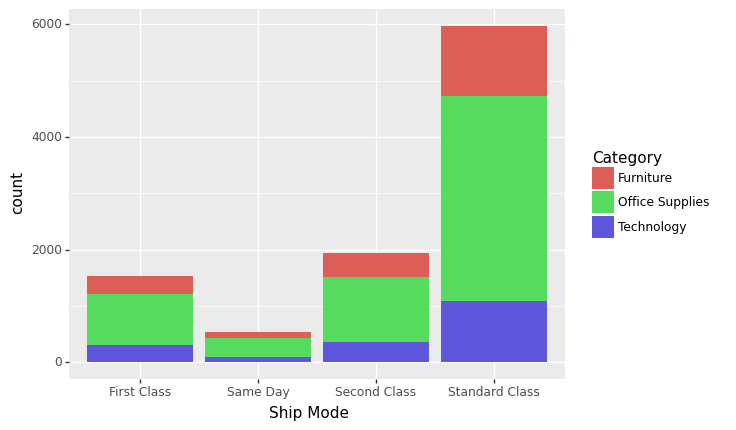

<ggplot: (8778390471149)>

In [ ]:
ggplot(sample, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

Plotting a Pairplot on sub Category with Profit Discount Quality and Sales

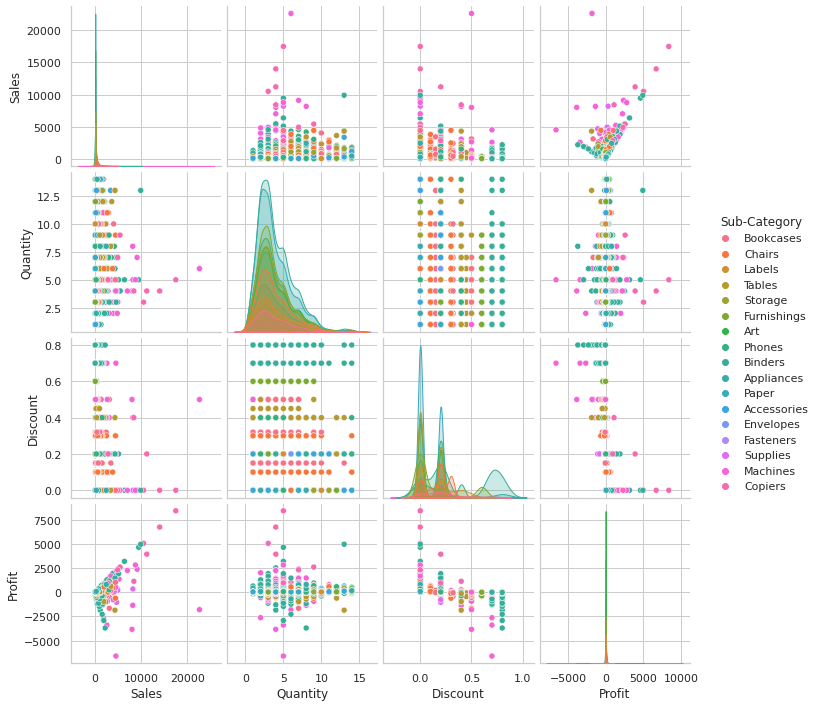

In [ ]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')

"binders" sub-category has been the most volatile in term of profits and loss.
Next highest loss suffering category is machines.

"Copiers" has no losses with the highest profits among others.

###Box Plot - Sales from Every Segments Of United States

The Data seems to have outliners.
Let's explore more about these outliers by using boxplots.
we'll check Sales from Every Segments of Whole Data

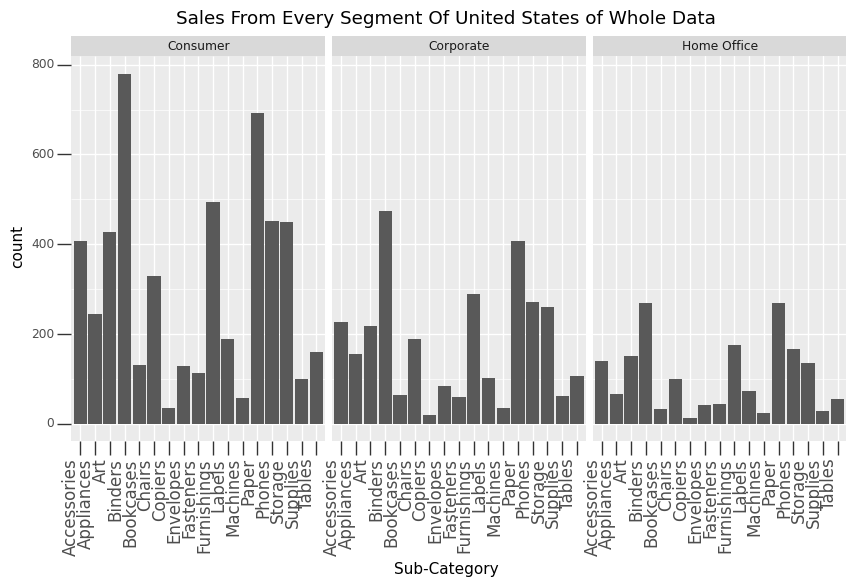

<ggplot: (8778389708605)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

"Home Office" segment seems to have way less purchased Sub-Categories than others 

"Consumer" segment purchased more sub-categories as compared to other segments.

"Envelope", "Papers" has the lowest Sales across segments

###Box Plot - Discount Count on Categories From Every Segment Of United States

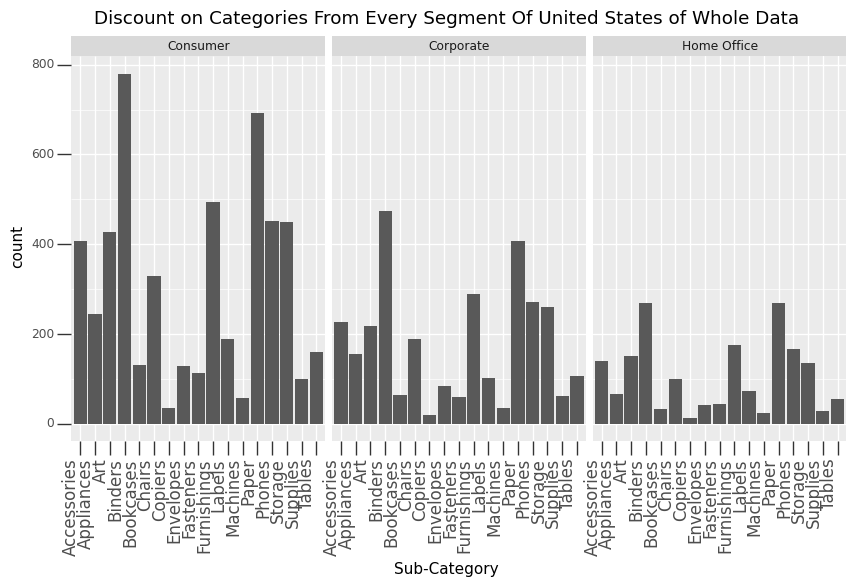

<ggplot: (8778390487193)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

We can observe that every the trend of sales goes similar to the trend of Discounts

###Sales From Every State Of United States

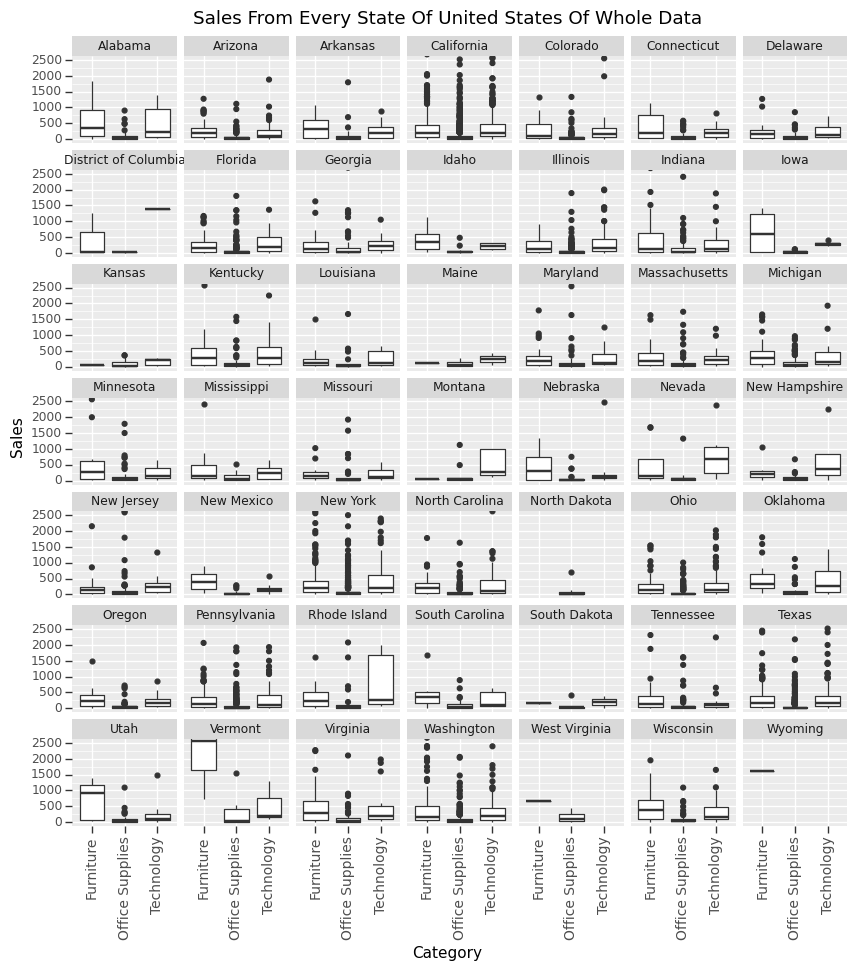

<ggplot: (8778386650737)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,
                     axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2500))+ggtitle("Sales From Every State Of United States Of Whole Data"))

The above Box Plot represents the sales in various segment among the states of the United States.

The sales was upto 20,000 but here we have taken here small range of (0,2000) so that we can vidualize in the common price range of the sales.



The Outlier here means that price of some categories in different states has higher prices compared to other.


###Profit/Loss From Every State Of United States

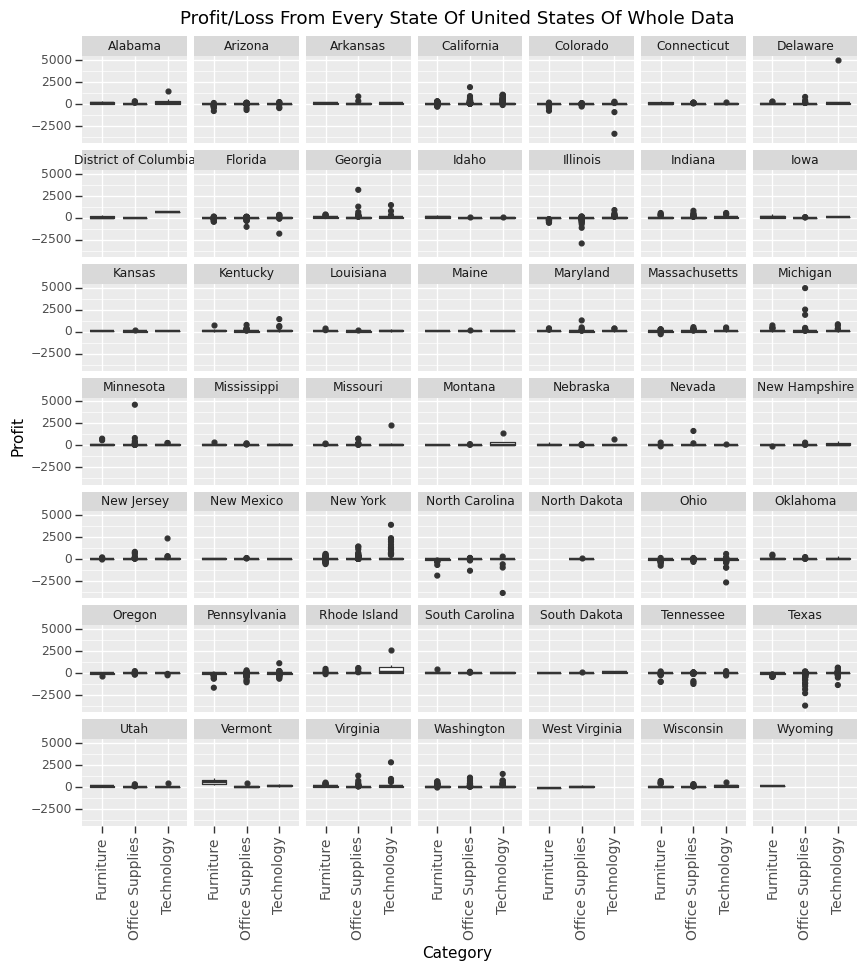

<ggplot: (8778386663917)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+coord_cartesian(ylim = (-4000,5000))+ggtitle("Profit/Loss From Every State Of United States Of Whole Data"))

From the above graph we can observe the profit/loss of each segments in each State of the United States.


Good Profit has been seen in the States like "Virginia","Washington","Newyork"


The highest loss is was in the "texas" states in "office suplies" category.




Some states have not showned much profit and loss like "South Dakota","West Virginia" etc.




###Sales From Every Region Of United States

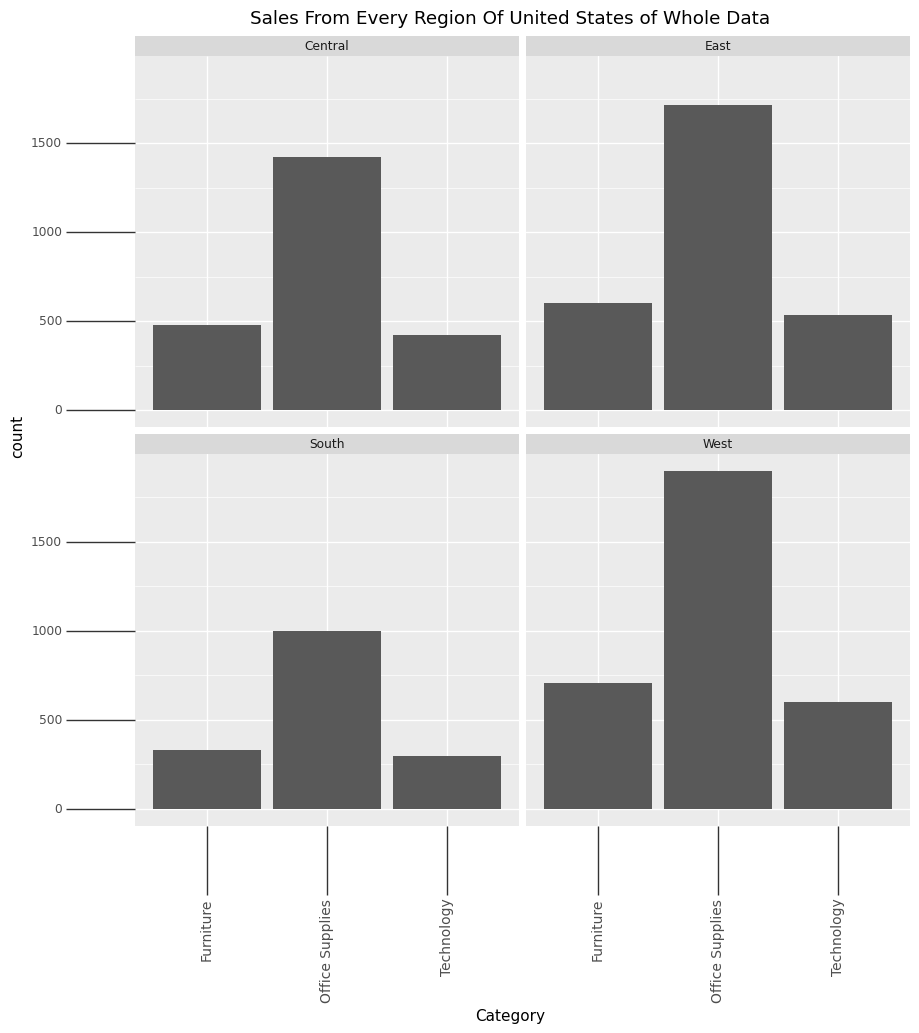

<ggplot: (8778387981013)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sample, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))


"Office supplies" have high sales in every Region compared to other Categories.


"Technology" and "Furniture" has very less sale in South Region.

###Discount on number of Quantity From Every State

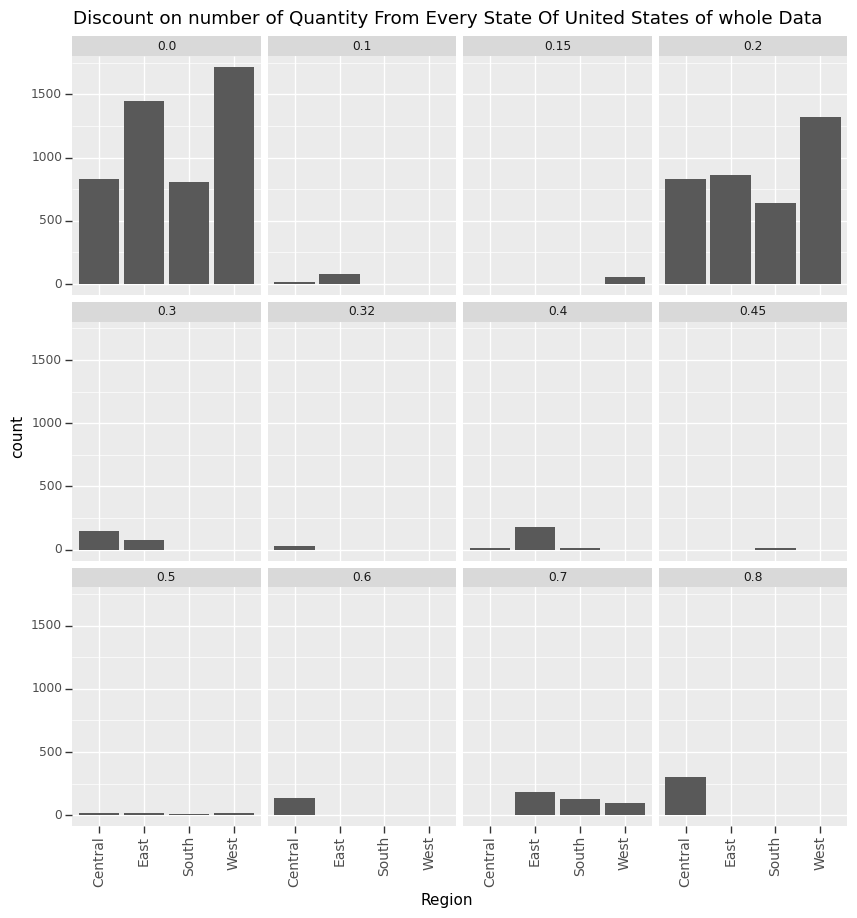

<ggplot: (8778387607265)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Region', fill='Quantity')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Discount']) + flip_xlabels+ggtitle("Discount on number of Quantity From Every State Of United States of whole Data"))

We observe no discount on higher quantity items purchased on any region of US.



0.2 Discount were given on higher quantity items purchased on any region of US.

###Discount on Categories From Every State

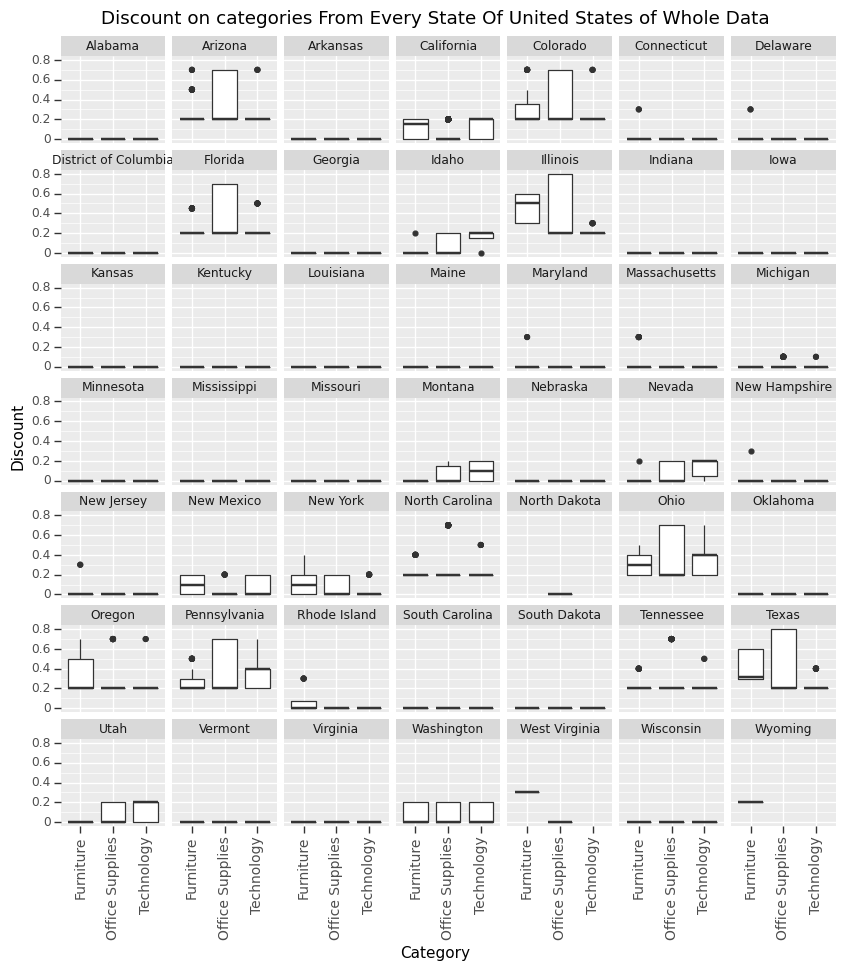

<ggplot: (8778387985025)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States of Whole Data"))


We observe the most discounts were given on categories in given some states like "Texas","Oregon","Pennsylvania","Washinfton","Ohio","Newyork","Mexico","Utah" etc. 



Some states where no discounts were given on Categories. Like "Vermont","Virginia","Washington","West Virgenia" etc.


###Grouping the sales, profit, discount, quantity wrt state, region, sub-categories sales.

In [ ]:
grouped=pd.DataFrame(sample.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


###Statistical Description of Profits in each State 

In [ ]:
### sum,mean,min,max,count median,standard deviation,Variance of each states of Profit
sample.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


The Sum gives us the most profitable State and the states lagging.


The count gives us the idea of the sales
Variance gives a intuition on haw volatile the profit/loss is.


###Sales From Every Region Of United States After Grouping

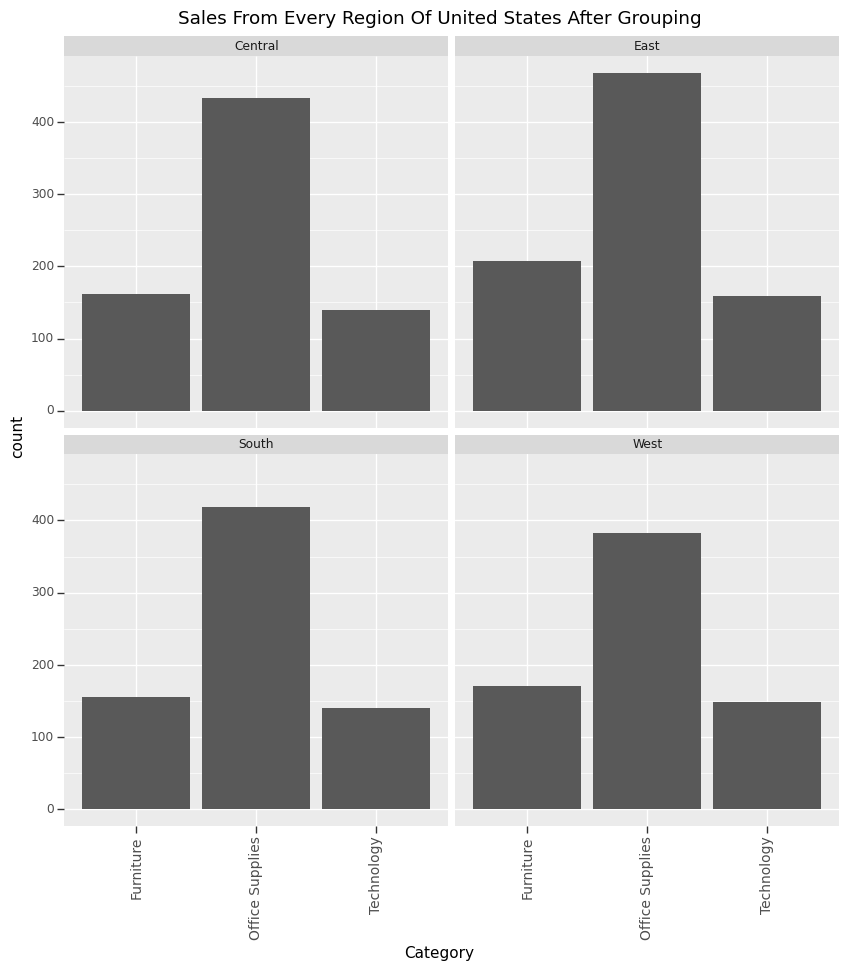

<ggplot: (8778385831113)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
 + facet_wrap(['Region']) + flip_xlabels+ggtitle("Sales From Every Region Of United States After Grouping"))

We observe office supplies on top sales across regions.

###Sales From Every State Of United States After Grouping

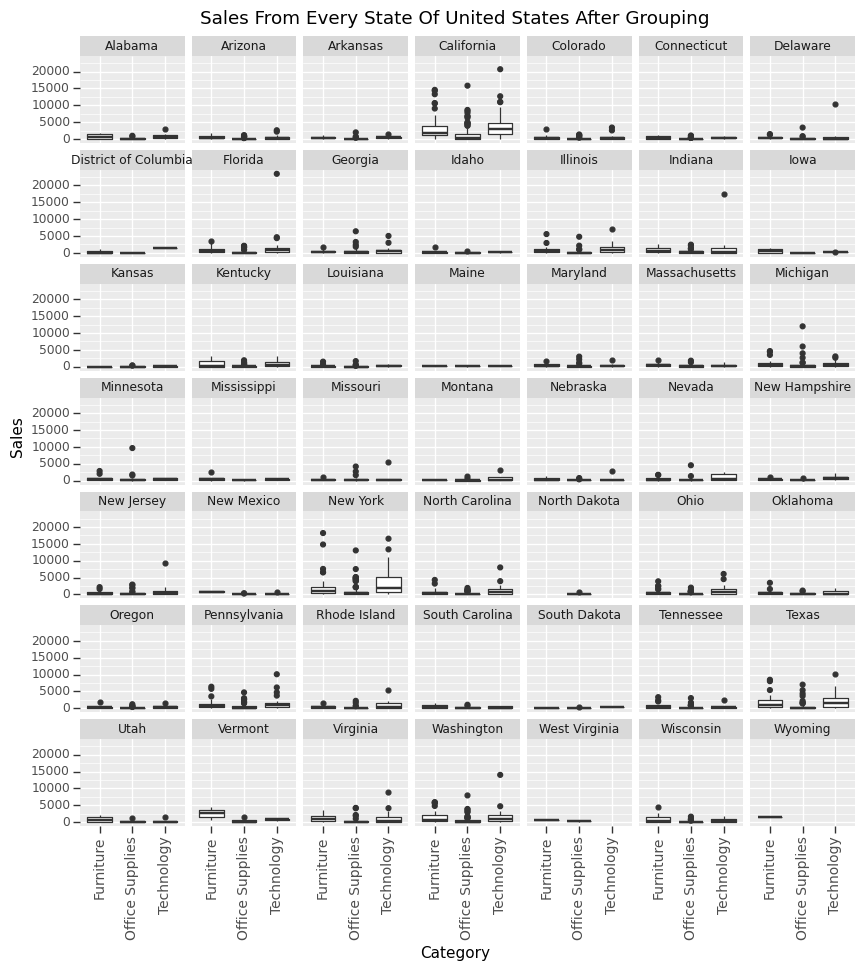

<ggplot: (8778386603733)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Sales From Every State Of United States After Grouping"))


We observe some states like "New York", "California", "Michigan" experienced higher number of sales compared to othes

###Profit/Loss From Every State Of United States After Grouping

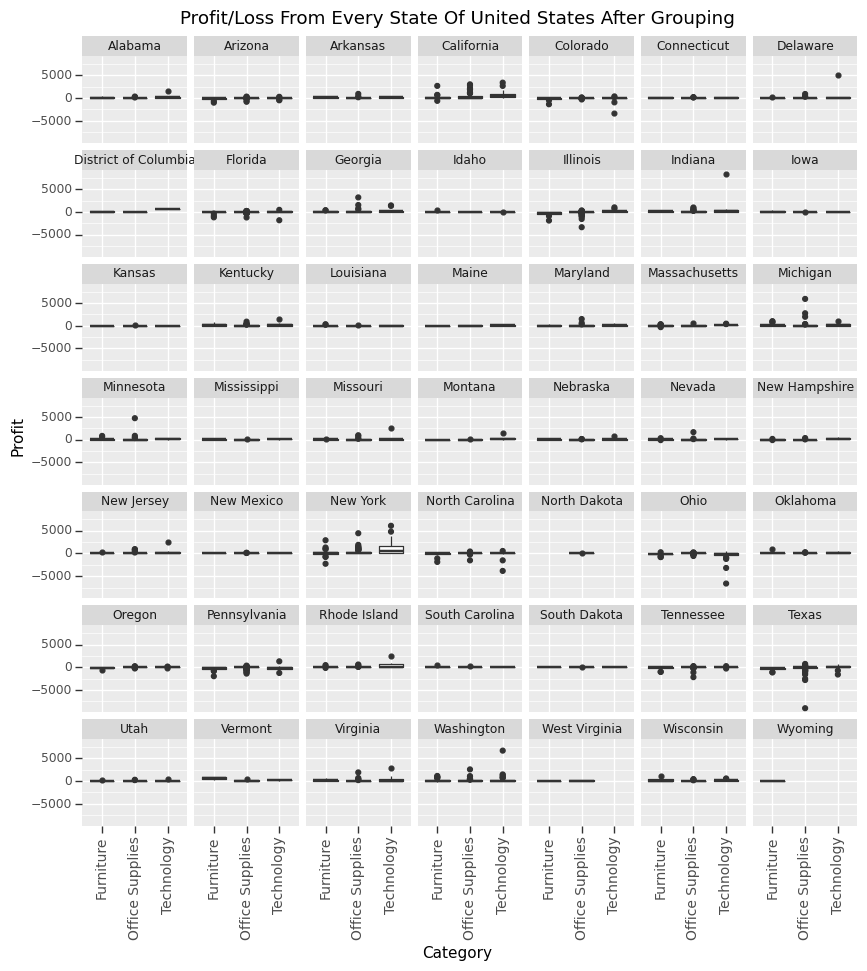

<ggplot: (8778389153373)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Profit/Loss From Every State Of United States After Grouping"))


We observe States like "California", "Washington","Wisconsin" were profitable across groups while
States like "Illinois", "North Carolina" mostly suffered losses

###Discount on categories From Every State Of United States After Grouping

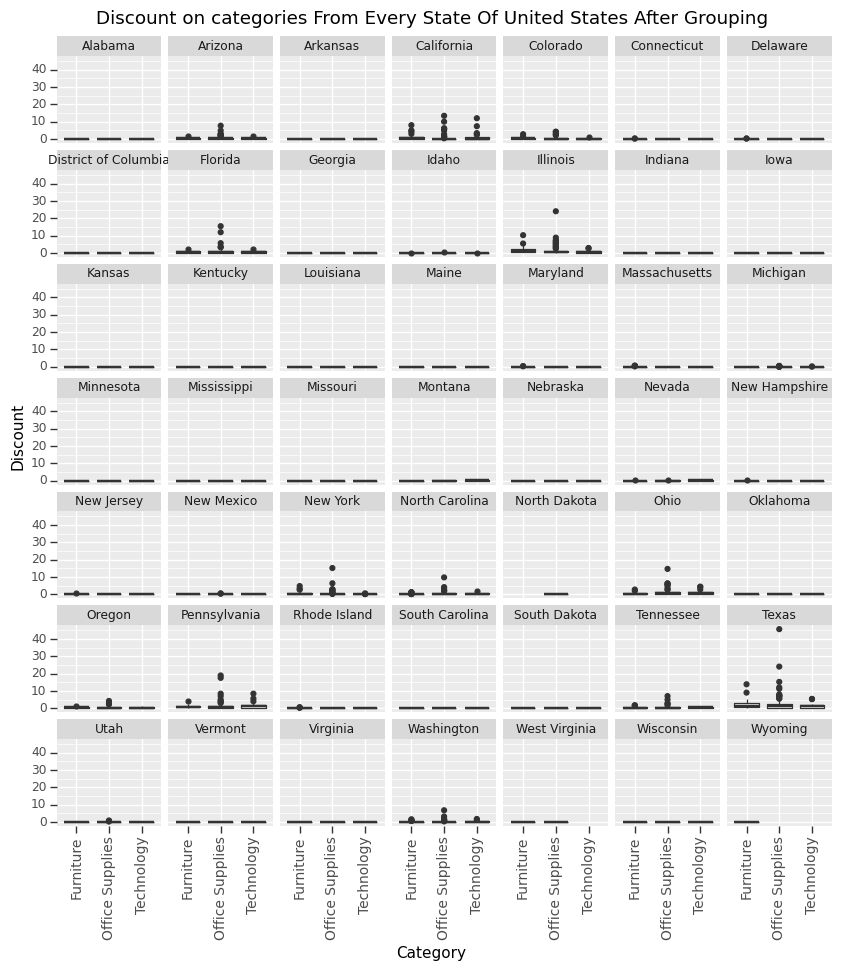

<ggplot: (8778385870113)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States After Grouping"))



We Observe the states like "Texas","Pennsylvania","NewYork","Ohio","North Carolina","California","Florida","Illionis" get the  highest number of Discounts on different Categories while in other states either there were no discounts on category or in very less number of Discounts are given.

# Using Cluster Analysis(K-Mean Clustering)

In [ ]:
from sklearn.cluster import KMeans
wcss = []

x = sample.iloc[:, [9, 10, 11, 12]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

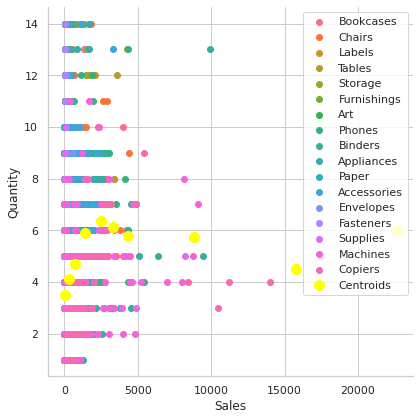

In [ ]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

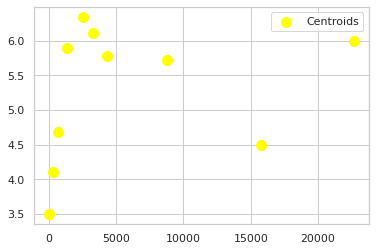

In [ ]:
#Seperating the Centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

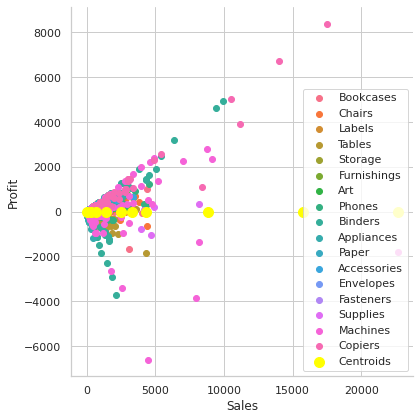

In [ ]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

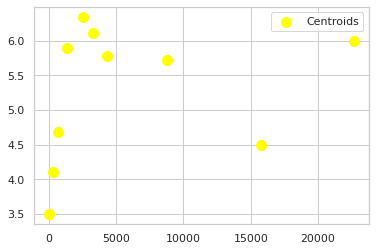

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#Conclusion 

By performing Exploratory Data Analysis on the Retail Dataset, Visualization and Clustering we can make intepretation on the states' profits and sales.


We have also oberved different discount ranges and their reach wrt various factors like region, state etc.
